## SimpleImputer
### This notebook outlines the usage of Simple Imputer (Univariate Imputation).
### Simple Imputer substitutes missing values statistics (mean, median, ...)
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [83]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### How many Categorical variables in the dataset?

In [84]:
df.info()

categorical_feature_names = []

for feature_name in df.columns:
    unique_values = df[feature_name].unique()

    # Check if the feature has only the values 1 and 0
    if set(unique_values) == {0, 1}:
        categorical_feature_names.append(feature_name)

print("List of categorical feature names including education:")
categorical_feature_names.append('education')
print(categorical_feature_names)
print(f"There are {len(categorical_feature_names)} categorical features")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
List of categ

### How many Missing values in the dataset?
Hint: df.Series.isna( ).sum( )

In [85]:
for i in range(len(df.columns)):
    missing_data = df[df.columns[i]].isna().sum()
    perc = missing_data / len(df) * 100
    print(f'{df.columns[i]} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

male >> Missing entries: 0  |  Percentage: 0.0
age >> Missing entries: 0  |  Percentage: 0.0
education >> Missing entries: 105  |  Percentage: 2.48
currentSmoker >> Missing entries: 0  |  Percentage: 0.0
cigsPerDay >> Missing entries: 29  |  Percentage: 0.68
BPMeds >> Missing entries: 53  |  Percentage: 1.25
prevalentStroke >> Missing entries: 0  |  Percentage: 0.0
prevalentHyp >> Missing entries: 0  |  Percentage: 0.0
diabetes >> Missing entries: 0  |  Percentage: 0.0
totChol >> Missing entries: 50  |  Percentage: 1.18
sysBP >> Missing entries: 0  |  Percentage: 0.0
diaBP >> Missing entries: 0  |  Percentage: 0.0
BMI >> Missing entries: 19  |  Percentage: 0.45
heartRate >> Missing entries: 1  |  Percentage: 0.02
glucose >> Missing entries: 388  |  Percentage: 9.16
TenYearCHD >> Missing entries: 0  |  Percentage: 0.0


### Bonus: Visual representation of missing values

<Axes: >

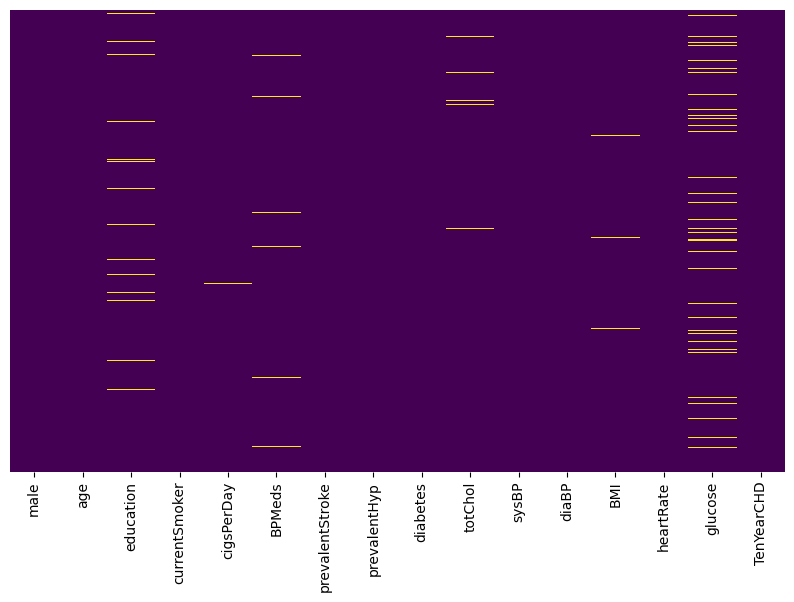

In [86]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Import SimpleImputer

In [87]:
from sklearn.impute import SimpleImputer


### Create SimpleImputer object with 'mean' strategy

In [88]:
imputer = SimpleImputer(strategy='mean')


### Optional - converting df into numpy array (There is a way to directly impute from dataframe as well)

In [89]:
df_array = df.values


In [106]:
X = data[:, :-1]
y = data[:, -1]

### Fit the imputer model on dataset to calculate statistic for each column

In [99]:
imputer.fit(df)

# Now, you can access the statistics for each column
df_imputed = pd.Series(imputer.statistics_, index=df.columns)

# Display the calculated statistics
print("\nImputation statistics for each column:")
print(df_imputted)


Imputation statistics for each column:
male                 0.429212
age                 49.584946
education            1.978950
currentSmoker        0.494101
cigsPerDay           9.003089
BPMeds               0.029630
prevalentStroke      0.005899
prevalentHyp         0.310524
diabetes             0.025720
totChol            236.721585
sysBP              132.352407
diaBP               82.893464
BMI                 25.802008
heartRate           75.878924
glucose             81.966753
TenYearCHD           0.151958
dtype: float64


### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values from the calculated statistic using transform( ) 

In [100]:
# # Apply imputation on the DataFrame
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)



### Sanity Check: Whether missing values are filled or not

In [101]:
# Check the missing values in the imputed DataFrame
print("\nNumber of missing values after imputation:")
print(df_imputed.isna().sum())


Number of missing values after imputation:
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


### Let's try to visualize the missing values.

<Axes: >

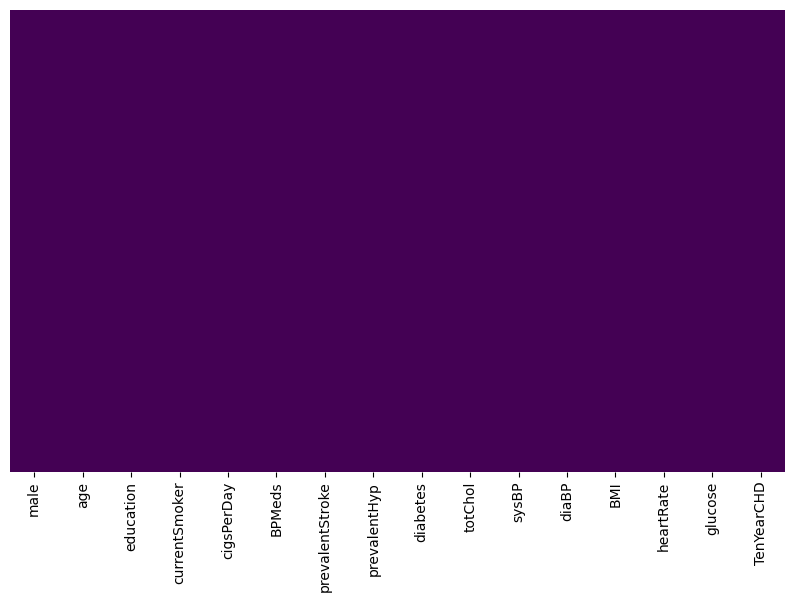

In [102]:
plt.figure(figsize=(10,6))
sns.heatmap(df_imputed.isna(), cbar=False, cmap='viridis', yticklabels=False)

### What's the issue here?
#### Hint: Heatmap needs a DataFrame and not a Numpy Array

In [107]:
df_imputed

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.00000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.00000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,1.0,20.0,0.00000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,1.0,30.0,0.00000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,3.0,1.0,23.0,0.00000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.00000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000,1.0
4234,1.0,51.0,3.0,1.0,43.0,0.00000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000,0.0
4235,0.0,48.0,2.0,1.0,20.0,0.02963,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.00000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.966753,0.0


# Check if these datasets contain missing data
### Load the datasets

In [118]:
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("Y_train.csv")
Y_test = pd.read_csv("Y_test.csv")
X_test = pd.read_csv("X_test.csv")

In [119]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((384, 12), (384, 1), (96, 12), (96, 1))

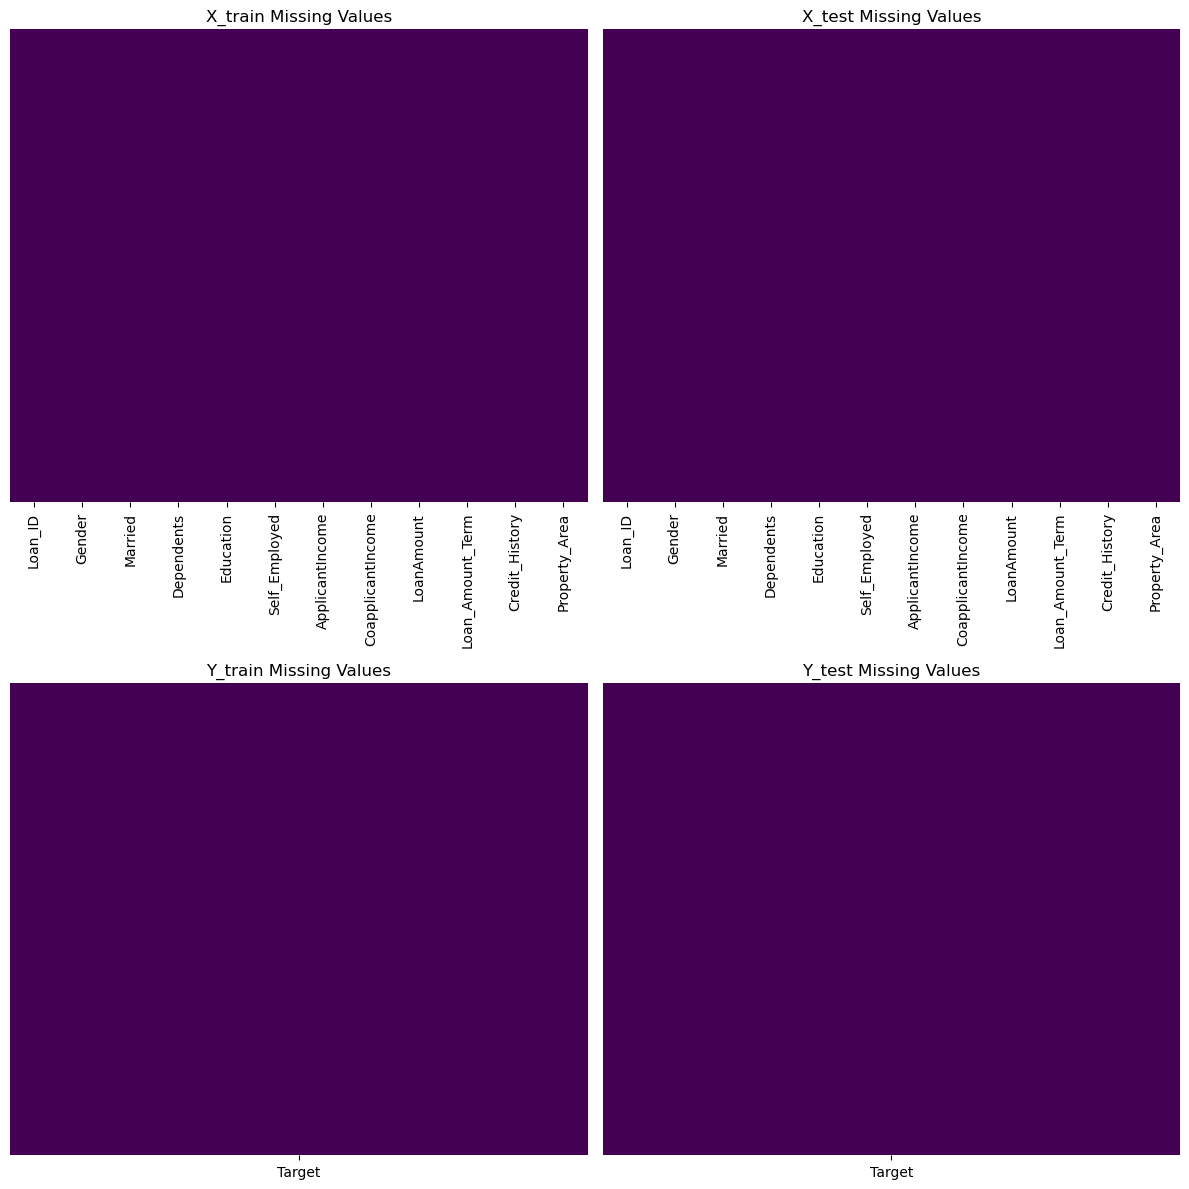

In [121]:
# Set up subplots
plt.figure(figsize=(12, 12))

# Plot for X_train
plt.subplot(2, 2, 1)
sns.heatmap(X_train.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('X_train Missing Values')

# Plot for X_test
plt.subplot(2, 2, 2)
sns.heatmap(X_test.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('X_test Missing Values')

# Plot for Y_train
plt.subplot(2, 2, 3)
sns.heatmap(Y_train.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Y_train Missing Values')

# Plot for Y_test
plt.subplot(2, 2, 4)
sns.heatmap(Y_test.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Y_test Missing Values')

plt.tight_layout()
plt.show()

### Is there missing data in this dataset???

In [113]:
#No, there isn't any missing data in dataset

# Build a Logistic Regression model Without imputation

In [223]:
df=pd.read_csv("heart_disease.csv")
X = df[df.columns[:-1]].fillna(method='ffill')
y = df[df.columns[-1]]

In [224]:
model = LogisticRegression()

In [225]:
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8496932515337423


C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Drop all rows with missing entries - Build a Logistic Regression model and benchmark the accuracy

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [154]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [155]:
df.shape

(4238, 16)

### Drop rows with missing values

In [156]:
df_dropped=df.dropna()

### Split dataset into X and y

In [157]:
X = df_dropped[df_dropped.columns[:-1]]
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0


In [158]:
y = df_dropped[df_dropped.columns[-1]]
y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3656, dtype: int64

### Create a pipeline with model parameter

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold


pipe=make_pipeline(StandardScaler(),LogisticRegression())
pipe.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [160]:
# Create RepeatedStratifiedKFold with 10 splits, 3 repeats, and random_state=1
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [161]:
# Call cross_val_score with pipeline, X, y, accuracy metric, and cv
accuracy_scores = cross_val_score(pipe, X, y, scoring='accuracy', cv=cv)
print(f'Scores: {accuracy_scores}')
# Print the mean accuracy and standard deviation
print(f'Mean Accuracy: {accuracy_scores.mean()}')
print(f'Standard Deviation: {accuracy_scores.std()}')
print("a mean accuracy of 85.34% indicates that your logistic regression model is performing well on average, and the low standard deviation suggests that the performance consistency across different folds is reasonably stable.")

Scores: [0.85245902 0.86065574 0.85245902 0.8579235  0.84972678 0.8442623
 0.85205479 0.8739726  0.84931507 0.85479452 0.86612022 0.84972678
 0.8579235  0.8442623  0.8442623  0.84699454 0.85753425 0.84931507
 0.85479452 0.84931507 0.85245902 0.86065574 0.85245902 0.84153005
 0.87431694 0.84699454 0.85479452 0.84931507 0.85753425 0.84383562]
Mean Accuracy: 0.8533922199765451
Standard Deviation: 0.007901044653733329
a mean accuracy of 85.34% indicates that your logistic regression model is performing well on average, and the low standard deviation suggests that the performance consistency across different folds is reasonably stable.


### Print the Mean Accuracy and Standard Deviation from scores

In [35]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.848  | Std: 0.006


### Mean Accuracy: 0.848  | Std: 0.006 When dropping rows

# Build a Logistic Regression model with SimpleImputer Mean Strategy

In [171]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

In [172]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Split dataset into X and y

In [173]:
df.shape
# Separate features (X) and target (y)
X = df[df.columns[:-1]]
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN


In [174]:
y = df[df.columns[-1]]
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

### Create a SimpleImputer with mean strategy

In [195]:
# Create a pipeline with SimpleImputer and StandardScaler for preprocessing
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Example: Using mean strategy for imputation
    ('scaler', StandardScaler())
])

### Create a Logistic Regression model

In [196]:
# Create a Logistic Regression model
model = LogisticRegression()

### Create a pipeline with impute and model parameters

In [201]:
final_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', model)
])
# Fit the final pipeline with the entire dataset
pipeline_1=final_pipeline.fit(X, y)


### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [202]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [203]:
scores = cross_val_score(pipeline_1, X, y, scoring='accuracy', cv=cv)


In [180]:
scores

array([0.8490566 , 0.85377358, 0.84669811, 0.8490566 , 0.84433962,
       0.84669811, 0.84669811, 0.8490566 , 0.84869976, 0.85106383,
       0.8490566 , 0.85377358, 0.85141509, 0.85613208, 0.84669811,
       0.85141509, 0.84433962, 0.8490566 , 0.8534279 , 0.8534279 ,
       0.85141509, 0.85141509, 0.8490566 , 0.84433962, 0.85141509,
       0.85141509, 0.85141509, 0.85613208, 0.84869976, 0.8463357 ])

### Print the Mean Accuracy and Standard Deviation

In [204]:

# Print the Mean Accuracy and Standard Deviation
mean_accuracy = scores.mean()
std_deviation = scores.std()

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Standard Deviation: {std_deviation}")

Mean Accuracy: 0.8545720148088674
Standard Deviation: 0.005801512841800946


### Which accuracy is better? 
- Dropping missing values
- SimpleImputer with Mean Strategy

### By using Standard Scaler accuracy improved from 84.9% to 85.4% with simple impute mean stratergy. Although Standard deviation increased by 0.2%. 
### Droping: 84.6% vs SImpute: 85.4%

# SimpleImputer Mean - Benchmark after Mean imputation with RandomForest

### Import libraries

In [206]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score


### Create a SimpleImputer with mean strategy

In [207]:
# Load your dataset
df = pd.read_csv("heart_disease.csv")

# Separate features (X) and target (y)
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

# Create a SimpleImputer with mean strategy
imputer = SimpleImputer(strategy='mean')

### Create a RandomForest model

In [208]:
# Create a RandomForest model
rf_model = RandomForestClassifier()

### Create a pipeline

In [209]:
# Create a pipeline with imputer, StandardScaler, and RandomForest
pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', StandardScaler()),
    ('rf', rf_model)
])

### Create RepeatedStratifiedKFold

In [210]:
# Create RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


### Create Cross_val_score

In [211]:
# Create Cross_val_score
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv)


### Print Mean Accuracy and Standard Deviation

In [212]:
# Print Mean Accuracy and Standard Deviation
print(f"Mean Accuracy: {scores.mean()}")
print(f"Standard Deviation: {scores.std()}")

Mean Accuracy: 0.8474155106531661
Standard Deviation: 0.006964572528087078


# Assignment
# Run experiments with different Strategies and different algorithms

## STRATEGIES
- Mean
- Median
- Most_frequent
- Constant

## ALGORITHMS
- Logistic Regression
- KNN
- Random Forest
- SVM
- Any other algorithm of your choice

#### Hint: Collect the pipeline creation, KFold, and Cross_Val_Score inside a for loop and iterate over different strategies in a list and different algorithms in a list

In [213]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

# Load your dataset
df = pd.read_csv("heart_disease.csv")

# Separate features (X) and target (y)
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

# Define strategies and algorithms
strategies = ['mean', 'median', 'most_frequent', 'constant']
algorithms = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC())
    # Add any other algorithms of your choice
]

# Iterate over strategies and algorithms
for strategy in strategies:
    for algo_name, algo_model in algorithms:
        # Create a SimpleImputer with the current strategy
        imputer = SimpleImputer(strategy=strategy)

        # Create a pipeline with imputer, StandardScaler, and the current algorithm
        pipeline = Pipeline([
            ('imputer', imputer),
            ('scaler', StandardScaler()),
            ('model', algo_model)
        ])

        # Create RepeatedStratifiedKFold
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

        # Create Cross_val_score
        scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv)

        # Print results
        print(f"Strategy: {strategy}, Algorithm: {algo_name}")
        print(f"Mean Accuracy: {scores.mean()}")
        print(f"Standard Deviation: {scores.std()}")
        print("\n" + "="*30 + "\n")


Strategy: mean, Algorithm: Logistic Regression
Mean Accuracy: 0.8545720148088674
Standard Deviation: 0.005801512841800946


Strategy: mean, Algorithm: KNN
Mean Accuracy: 0.8339650519648512
Standard Deviation: 0.00885273925919613


Strategy: mean, Algorithm: Random Forest
Mean Accuracy: 0.8501672688344707
Standard Deviation: 0.005844029053273887


Strategy: mean, Algorithm: SVM
Mean Accuracy: 0.848200373195355
Standard Deviation: 0.003706964775994121


Strategy: median, Algorithm: Logistic Regression
Mean Accuracy: 0.8545720148088674
Standard Deviation: 0.005801512841800946


Strategy: median, Algorithm: KNN
Mean Accuracy: 0.8345155522845205
Standard Deviation: 0.009149983683132011


Strategy: median, Algorithm: Random Forest
Mean Accuracy: 0.8487519886405877
Standard Deviation: 0.006981342642307474


Strategy: median, Algorithm: SVM
Mean Accuracy: 0.848200373195355
Standard Deviation: 0.003706964775994121


Strategy: most_frequent, Algorithm: Logistic Regression
Mean Accuracy: 0.854729

In [222]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

# Load your dataset
df = pd.read_csv("heart_disease.csv")

# Separate features (X) and target (y)
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

# Define strategies and algorithms
strategies = ['mean', 'median', 'most_frequent', 'constant']
# Algorithms
algorithms = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('SVM', SVC()),
    ('XGBoost', XGBClassifier()),
    ('LightGBM', LGBMClassifier()),
    ('CatBoost', CatBoostClassifier(silent=True)),
    ('Naive Bayes', GaussianNB()),
    ('Bagging', BaggingClassifier(base_estimator=None, n_estimators=10, random_state=1)),
    ('Stacking', StackingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier())], final_estimator=LogisticRegression()))
]

# Create an empty list to store results
results = []

# Iterate over strategies and algorithms
for strategy in strategies:
    for algo_name, algo_model in algorithms:
        # Create a SimpleImputer with the current strategy
        imputer = SimpleImputer(strategy=strategy)

        # Create a pipeline with imputer, StandardScaler, and the current algorithm
        pipeline = Pipeline([
            ('imputer', imputer),
            ('scaler', StandardScaler()),
            ('model', algo_model)
        ])

        # Create RepeatedStratifiedKFold
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

        # Create Cross_val_score
        scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv)

        # Append results to the list
        results.append({
            'Strategy': strategy,
            'Algorithm': algo_name,
            'Mean Accuracy': scores.mean(),
            'Standard Deviation': scores.std()
        })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)
# Convert the mean accuracy and standard deviation to percentage format
results_df['Mean Accuracy'] = (results_df['Mean Accuracy'] * 100).round(2)
results_df['Standard Deviation'] = (results_df['Standard Deviation'] * 100).round(2)

# Display the results
print(results_df)

[LightGBM] [Info] Number of positive: 580, number of negative: 3234
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 3814, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152071 -> initscore=-1.718447
[LightGBM] [Info] Start training from score -1.718447
[LightGBM] [Info] Number of positive: 580, number of negative: 3234
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1021
[LightGBM] [Info] Number of data points in the train set: 3814, number of used features: 15
[LightGBM] [Info] [binary:

C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-p

[LightGBM] [Info] Number of positive: 580, number of negative: 3234
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1017
[LightGBM] [Info] Number of data points in the train set: 3814, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152071 -> initscore=-1.718447
[LightGBM] [Info] Start training from score -1.718447
[LightGBM] [Info] Number of positive: 580, number of negative: 3234
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000507 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 3814, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152071 -> initscore=-1.718447
[LightGBM] [Info] Start training from score -1.718447
[LightGBM] [Info] Nu

C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-p

[LightGBM] [Info] Number of positive: 580, number of negative: 3234
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1017
[LightGBM] [Info] Number of data points in the train set: 3814, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152071 -> initscore=-1.718447
[LightGBM] [Info] Start training from score -1.718447
[LightGBM] [Info] Number of positive: 580, number of negative: 3234
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 3814, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152071 -> initscore=-1.718447
[LightGBM] [Info] Start training from score -1.718447
[LightGBM] [Info] Nu

C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-p

[LightGBM] [Info] Number of positive: 580, number of negative: 3234
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 3814, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152071 -> initscore=-1.718447
[LightGBM] [Info] Start training from score -1.718447
[LightGBM] [Info] Number of positive: 580, number of negative: 3234
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1021
[LightGBM] [Info] Number of data points in the train set: 3814, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152071 -> initscore=-1.718447
[LightGBM] [Info] Start training from score -1.718447
[LightGBM] [Info] Nu

C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-p

         Strategy            Algorithm  Mean Accuracy  Standard Deviation
0            mean  Logistic Regression          85.46                0.58
1            mean                  KNN          83.40                0.89
2            mean        Random Forest          84.92                0.69
3            mean    Gradient Boosting          84.61                0.79
4            mean                  SVM          84.82                0.37
5            mean              XGBoost          83.53                1.11
6            mean             LightGBM          84.43                0.85
7            mean             CatBoost          84.49                0.67
8            mean          Naive Bayes          82.41                1.30
9            mean              Bagging          83.40                1.14
10           mean             Stacking          85.37                0.62
11         median  Logistic Regression          85.46                0.58
12         median                  KNN

# Q1: Which is the best strategy for this dataset using Random Forest algorithm?

### Q1: The best strategy for this dataset using Random Forest algorithm is Median 84.92% accuracy

# Q2:  Which is the best algorithm for this dataset using Mean Strategy?
### A2: The best algorithm for this dataset using the Mean Strategy is Logistic Regression (Mean Accuracy: 85.46%).

# Q3: Which is the best combination of algorithm and best Imputation Strategy overall?
### A3: The best combination of algorithm and imputation strategy overall is Mean Strategy with Logistic Regression (Mean Accuracy: 85.46%).